In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Part1
#Q1
data=pd.read_excel(r"C:\Users\USER\Downloads\ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx")

In [11]:
data.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [7]:
#Q2
data.isnull().any()

Age                           False
Total Work Experience         False
Number of years in city       False
Cost to Request Ratio         False
Cibil score                   False
Overdrafts past12months       False
Total bounces past12months    False
dtype: bool

In [8]:
#Q3
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [10]:
#Q4
data.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


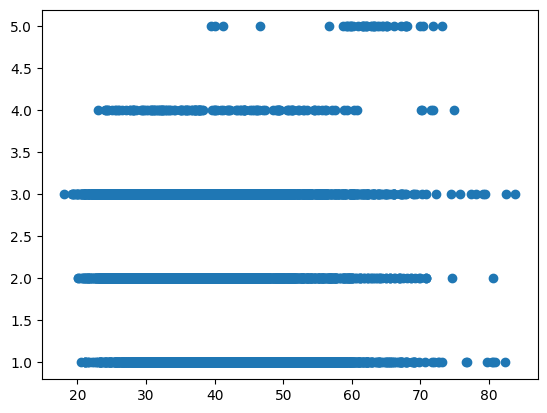

In [15]:
#Q5
plt.scatter (data["Age"],data["Total Work Experience"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a16d207750>,
 'caps': [<matplotlib.lines.Line2D at 0x2a16d2079d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a16d207610>],
 'medians': [<matplotlib.lines.Line2D at 0x2a16d207c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a16d207d90>],
 'means': []}

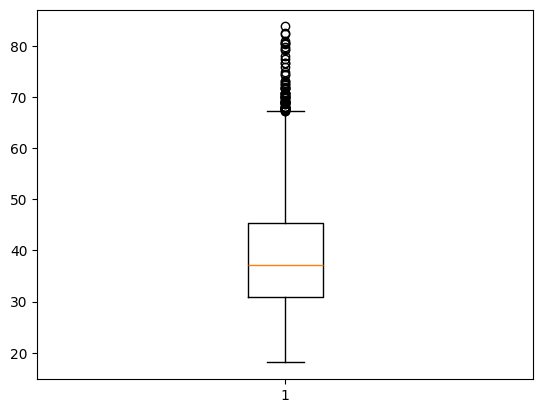

In [16]:
#Q6
plt.boxplot(data["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a16d26b750>,
 'caps': [<matplotlib.lines.Line2D at 0x2a16d26b9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a16d26b610>],
 'medians': [<matplotlib.lines.Line2D at 0x2a16d26bc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a16d26bd90>],
 'means': []}

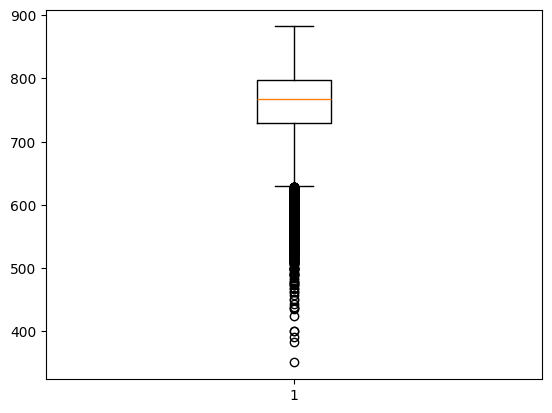

In [17]:
#Q7
plt.boxplot(data["Cibil score"])

In [20]:
#Q8
x = data.drop('Total bounces past12months', axis=1)  #feature data
y = data['Total bounces past12months']  #target Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#Part2
#Q1
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#Q2
clf = KNeighborsClassifier()

In [27]:
clf.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
#Q3
clf.score(x_test,y_test)*100

66.64813785436353

In [29]:
#Q4
clf.score(x_train,y_train)*100

67.50972762645915

In [32]:
y_pred=clf.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [36]:
#Q5
accuracy_score(y_test,y_pred)*100

66.64813785436353

In [39]:
#Q6
test_scores = []
train_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(x_train,y_train)
    
    train_scores.append(model.score(x_train,y_train))
    test_scores.append(model.score(x_test,y_test))

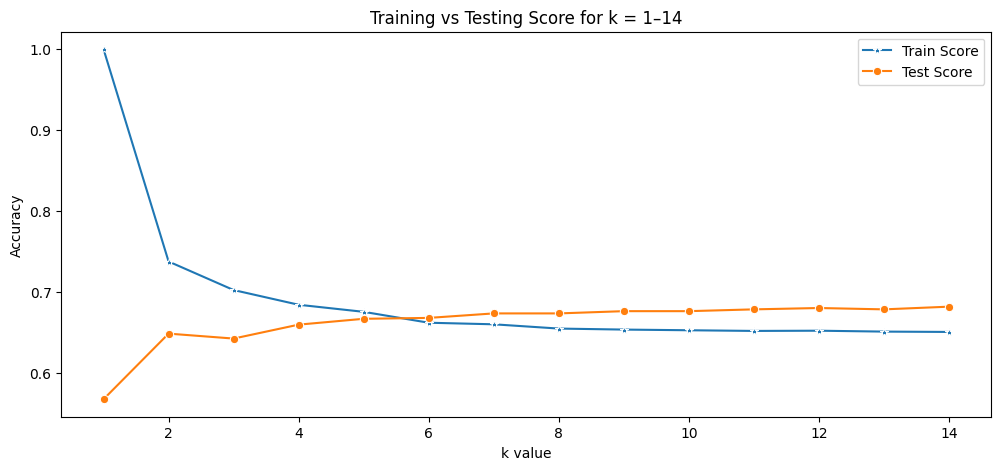

In [47]:
#Q7
plt.figure(figsize=(12,5))
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores,  marker='o', label='Test Score')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Score for k = 1–14')
plt.legend()
plt.show()